# Import panda and numpy

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

## Read the Data

In [15]:
cc_orig = pd.read_csv(r'C:\radha\PythonCodes\seaborn-data\car_crashes.csv',index_col='abbrev')
cc_copy = cc_orig.copy()
cc_copy.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63


## Scale the Data

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cc_copy) ## Scales the copy of crash data in range -3 and 3
scaled_df[:5]

array([[ 0.73744574,  1.1681476 ,  0.43993758,  1.00230055,  0.27769155,
        -0.58008306,  0.4305138 ],
       [ 0.56593556,  1.2126951 , -0.21131068,  0.60853209,  0.80725756,
         0.94325764, -0.02289992],
       [ 0.68844283,  0.75670887,  0.18761539,  0.45935701,  1.03314134,
         0.0708756 , -0.98177845],
       [ 1.61949811, -0.48361373,  0.54740815,  1.67605228,  1.95169961,
        -0.33770122,  0.32112519],
       [-0.92865317, -0.39952407, -0.8917629 , -0.594276  , -0.89196792,
        -0.04841772,  1.26617765]])

## Build the Model

In [4]:
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters=3,random_state=42)
kmodel.fit(scaled_df)

KMeans(n_clusters=3, random_state=42)

In [5]:
kmodel.labels_

array([0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2,
       2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0])

In [6]:
cc_copy['Labels'] = kmodel.labels_
cc_copy.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,Labels
abbrev,,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08,0
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,0
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35,0
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39,0
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63,2


## Hyperparameter Tuning 

In [7]:
wcss = []
for i in range (1,10):
    kmodel = KMeans(n_clusters=i,random_state=42)
    kmodel.fit(cc_orig)
    wcss.append(kmodel.inertia_) ## append within cluster sum of squares into the wcss list

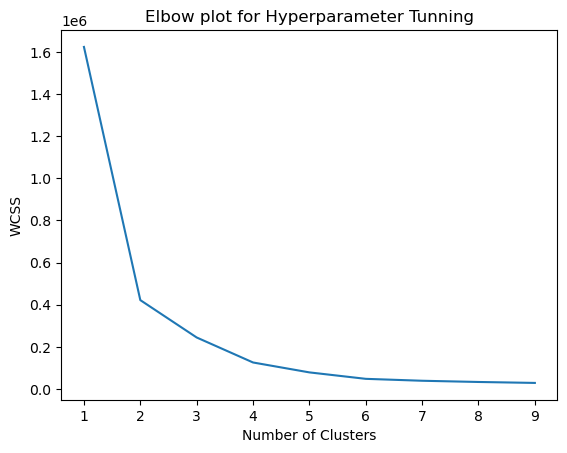

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),wcss)
plt.title('Elbow plot for Hyperparameter Tunning')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Make final Model and Show its result

In [10]:
final_model = KMeans(n_clusters=4,random_state=42)
final_model.fit(scaled_df)
cc_orig['Label'] = final_model.labels_
cc_orig.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,Label
abbrev,,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08,2
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,2
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35,2
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39,0
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63,1


In [14]:
grp = cc_orig.groupby('Label')
for x,y in grp:
    print(y)
    print('_'*60)

        total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
abbrev                                                                       
AR       22.4     4.032    5.824          21.056       21.280       827.34   
LA       20.5     7.175    6.765          14.965       20.090      1281.55   
MT       21.4     8.346    9.416          17.976       18.190       816.21   
ND       23.9     5.497   10.038          23.661       20.554       688.75   
OK       19.9     6.368    5.771          18.308       18.706       881.51   
SC       23.9     9.082    9.799          22.944       19.359       858.97   
TX       19.4     7.760    7.372          17.654       16.878      1004.75   
WV       23.8     8.092    6.664          23.086       20.706       992.61   

        ins_losses  Label  
abbrev                     
AR          142.39      0  
LA          194.78      0  
MT           85.15      0  
ND          109.72      0  
OK          178.86      0  
SC          116.29     